In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv("Data_feat.csv", index_col=False)

In [3]:
data.head()

,ID,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,...,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Standard Value
0,1.0,1.319920,-69493.070,-455029.72,85.696503,-8.01281,8.01281,-0.41004,41.208309,462.93146,...,16.125,6.875,2.00,0.000,0.0,268.74698,866.0,32.0,104.0,5.240000e+09
1,2.0,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,...,59.375,22.000,5.75,0.125,0.0,396.44699,2692.0,45.0,146.0,2.112000e+04
2,3.0,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,...,59.750,23.375,6.75,0.500,0.0,396.44699,2692.0,45.0,146.0,1.100000e+02
3,4.0,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,...,53.500,18.625,5.00,0.250,0.0,364.44901,2052.0,41.0,136.0,7.600000e+02
4,5.0,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,...,6.125,2.125,0.25,0.000,0.0,254.24100,670.0,31.0,102.0,1.000000e+04


In [4]:
# Define the conditions
conditions = [
    data['Standard Value'] <10000,
    (data['Standard Value'] >= 10000) & (data['Standard Value'] <=100000),
    data['Standard Value'] > 100000
]

In [5]:
# Define the corresponding values for each condition
choices = ['Active', 'Inactive', 'Outliers']

In [6]:
# Create a new column based on the conditions
data['Target'] = np.select(conditions, choices, default='Unknown')

In [7]:
data.head(10)

,ID,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Standard Value,Target
0,1.0,1.319920,-69493.070,-455029.72,85.696503,-8.01281,8.01281,-0.41004,41.208309,462.93146,...,6.875,2.000,0.000,0.0,268.74698,866.0,32.0,104.0,5.240000e+09,Outliers
1,2.0,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,...,22.000,5.750,0.125,0.0,396.44699,2692.0,45.0,146.0,2.112000e+04,Inactive
2,3.0,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,...,23.375,6.750,0.500,0.0,396.44699,2692.0,45.0,146.0,1.100000e+02,Active
3,4.0,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,...,18.625,5.000,0.250,0.0,364.44901,2052.0,41.0,136.0,7.600000e+02,Active
4,5.0,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,...,2.125,0.250,0.000,0.0,254.24100,670.0,31.0,102.0,1.000000e+04,Inactive
5,6.0,6.550340,-91770.219,-542604.63,-172.532140,-9.15655,9.15655,-0.96987,37.879929,467.78458,...,5.125,1.000,0.000,0.0,286.23898,896.0,36.0,114.0,4.000000e+03,Active
6,7.0,3.608530,-99869.219,-736305.63,18.799070,-8.71814,8.71814,0.17887,55.873447,646.39758,...,22.625,6.625,0.125,0.0,350.42200,1875.0,37.0,130.0,1.436000e+04,Inactive
7,8.0,1.699261,-99869.391,-736828.06,18.688320,-8.76566,8.76566,0.10465,55.873447,646.52686,...,21.375,5.750,0.125,0.0,350.42200,1875.0,37.0,130.0,1.647000e+04,Inactive
8,9.0,8.406270,-149283.420,-1410330.10,-236.255840,-9.24683,9.24683,-0.27639,82.963722,831.31604,...,10.750,2.625,0.000,0.0,500.63599,4128.0,56.0,174.0,2.500000e+04,Inactive
9,10.0,2.538302,-81708.516,-544830.75,70.131302,-8.64284,8.64284,0.21049,45.790688,551.32861,...,21.875,6.750,0.500,0.0,292.34198,1169.0,30.0,112.0,2.860000e+03,Active


In [8]:
new_df = data.drop(data[data['Target'] == 'Outliers'].index)

In [9]:
new_df.head()

,ID,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Standard Value,Target
1,2.0,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,...,22.000,5.75,0.125,0.0,396.44699,2692.0,45.0,146.0,21120.0,Inactive
2,3.0,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,...,23.375,6.75,0.500,0.0,396.44699,2692.0,45.0,146.0,110.0,Active
3,4.0,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,...,18.625,5.00,0.250,0.0,364.44901,2052.0,41.0,136.0,760.0,Active
4,5.0,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,...,2.125,0.25,0.000,0.0,254.24100,670.0,31.0,102.0,10000.0,Inactive
5,6.0,6.550340,-91770.219,-542604.63,-172.532140,-9.15655,9.15655,-0.96987,37.879929,467.78458,...,5.125,1.00,0.000,0.0,286.23898,896.0,36.0,114.0,4000.0,Active


In [10]:
new_df.isnull().sum()

ID                 14
AM1_dipole         16
AM1_E             177
AM1_Eele          177
AM1_HF            177
                 ... 
weinerPath         16
weinerPol          16
zagreb             16
Standard Value    173
Target              0
Length: 343, dtype: int64

In [11]:
new_df.shape

(11285, 343)

## Data Preprocessing

In [12]:
# Clean the data by removing missing values, outliers, and inconsistencies
new_df.dropna(inplace=True)  # Remove rows with missing values

In [13]:
new_df.isnull().sum()

ID                0
AM1_dipole        0
AM1_E             0
AM1_Eele          0
AM1_HF            0
                 ..
weinerPath        0
weinerPol         0
zagreb            0
Standard Value    0
Target            0
Length: 343, dtype: int64

### Feature Selection Techniques

In [14]:
new_df.columns

Index(['ID', 'AM1_dipole', 'AM1_E', 'AM1_Eele', 'AM1_HF', 'AM1_HOMO', 'AM1_IP',
       'AM1_LUMO', 'apol', 'ASA',
       ...
       'vsurf_Wp5', 'vsurf_Wp6', 'vsurf_Wp7', 'vsurf_Wp8', 'Weight',
       'weinerPath', 'weinerPol', 'zagreb', 'Standard Value', 'Target'],
      dtype='object', length=343)

In [15]:
data = new_df.drop("ID", axis=1)

In [16]:
data.head()

,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,ASA+,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Standard Value,Target
1,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,482.24640,...,22.000,5.75,0.125,0.0,396.44699,2692.0,45.0,146.0,21120.0,Inactive
2,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,476.69037,...,23.375,6.75,0.500,0.0,396.44699,2692.0,45.0,146.0,110.0,Active
3,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,439.34927,...,18.625,5.00,0.250,0.0,364.44901,2052.0,41.0,136.0,760.0,Active
4,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,228.68947,...,2.125,0.25,0.000,0.0,254.24100,670.0,31.0,102.0,10000.0,Inactive
5,6.550340,-91770.219,-542604.63,-172.532140,-9.15655,9.15655,-0.96987,37.879929,467.78458,255.07904,...,5.125,1.00,0.000,0.0,286.23898,896.0,36.0,114.0,4000.0,Active


In [17]:
data = data.drop("Standard Value", axis=1)

In [18]:
data.columns

Index(['AM1_dipole', 'AM1_E', 'AM1_Eele', 'AM1_HF', 'AM1_HOMO', 'AM1_IP',
       'AM1_LUMO', 'apol', 'ASA', 'ASA+',
       ...
       'vsurf_Wp4', 'vsurf_Wp5', 'vsurf_Wp6', 'vsurf_Wp7', 'vsurf_Wp8',
       'Weight', 'weinerPath', 'weinerPol', 'zagreb', 'Target'],
      dtype='object', length=341)

In [19]:
print("Total columns", len(data.columns))

Total columns 341


### Exploratory data analysis 

In [20]:
# Check the information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10754 entries, 1 to 11480
Columns: 341 entries, AM1_dipole to Target
dtypes: float64(340), object(1)
memory usage: 28.1+ MB
None


In [21]:
# Check the summary statistics of the dataset
print(data.describe())

         AM1_dipole          AM1_E      AM1_Eele        AM1_HF      AM1_HOMO  \
count  10754.000000   10754.000000  1.075400e+04  10754.000000  10754.000000   
mean       4.249982 -107007.255498 -7.916194e+05     22.905431     -8.801353   
std        2.441800   30338.166809  3.458635e+05    201.409620      0.490028   
min        0.001000 -267042.060000 -3.013898e+06   -583.188480    -14.239410   
25%        2.648035 -122429.167500 -9.405820e+05    -62.242668     -9.064868   
50%        3.940713 -102858.850000 -7.137959e+05      1.148345     -8.748225   
75%        5.321475  -85956.502250 -5.545399e+05     64.628510     -8.499230   
max       34.555798  -30241.963000 -1.022204e+05   1601.576400     -6.407450   

             AM1_IP      AM1_LUMO          apol           ASA          ASA+  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean       8.814724     -0.858442     56.433813    643.410493    231.314790   
std        0.530221      1.006444     16.3

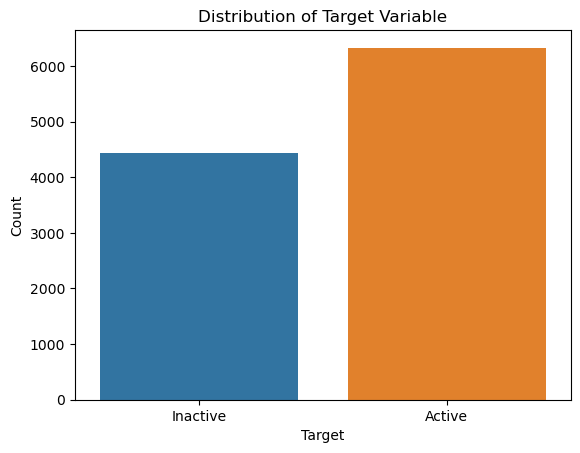

In [22]:
# Check the distribution of the target variable

sns.countplot(x='Target', data=data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [23]:
# Step 4: Feature Selection

# Perform feature selection using SelectKBest
X = data.drop("Target", axis=1)
y = data["Target"]
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['FASA_H', 'FASA_P', 'PEOE_VSA_FHYD', 'PEOE_VSA_FPNEG', 'PEOE_VSA_FPOL',
       'Q_VSA_FHYD', 'Q_VSA_FPNEG', 'Q_VSA_FPOL', 'Q_VSA_PNEG', 'SlogP'],
      dtype='object')


/home/gabriel/Application/Application/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gabriel/Application/Application/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


/tmp/ipykernel_8320/1515868663.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_features_with_target.corr(), annot=True, cmap='coolwarm')


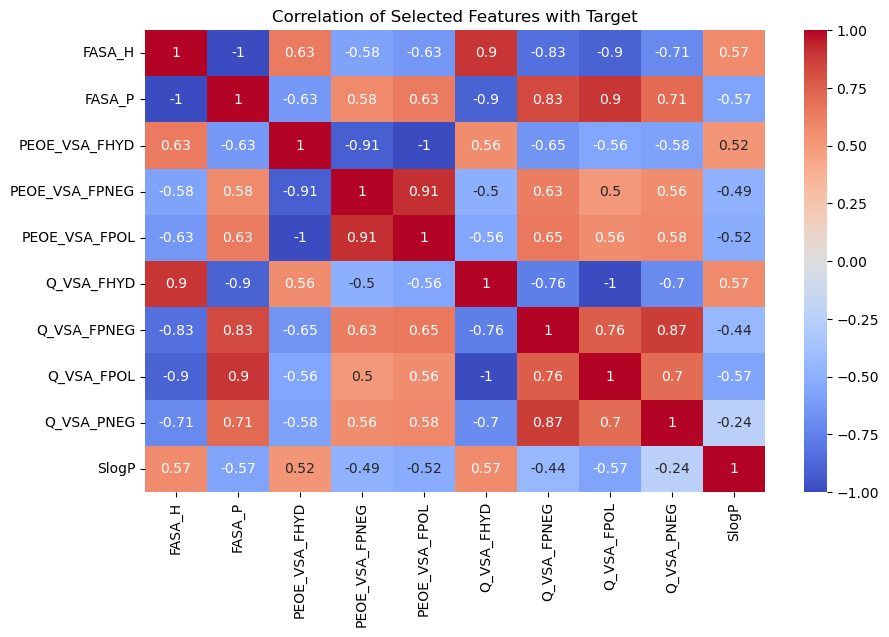

In [24]:
# Plot correlation of selected features with target
selected_features_with_target = X[selected_features].copy()
selected_features_with_target['Target'] = y

plt.figure(figsize=(10, 6))
sns.heatmap(selected_features_with_target.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Selected Features with Target')
plt.show()

In [25]:
data.corr()

/tmp/ipykernel_8320/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,ASA+,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
AM1_dipole,1.000000,-0.208953,-0.159830,0.113582,-0.026787,0.048950,-0.224637,0.127871,0.139606,-0.032851,...,0.044621,-0.019541,-0.015736,0.004543,0.025280,0.031102,0.196550,0.171238,0.161093,0.175604
AM1_E,-0.208953,1.000000,0.960583,0.272823,0.003962,0.001447,-0.040616,-0.864152,-0.898186,-0.471783,...,-0.436664,-0.234291,-0.211297,-0.192337,-0.096447,-0.054087,-0.953235,-0.840162,-0.873922,-0.924494
AM1_Eele,-0.159830,0.960583,1.000000,0.277386,-0.057636,0.067725,-0.135807,-0.933228,-0.924207,-0.495618,...,-0.419209,-0.217704,-0.194188,-0.171902,-0.073505,-0.029233,-0.947648,-0.840251,-0.909901,-0.945786
AM1_HF,0.113582,0.272823,0.277386,1.000000,-0.036152,0.134286,-0.689703,-0.073259,-0.142533,-0.378206,...,-0.230726,-0.207906,-0.186381,-0.160098,-0.084905,-0.055878,-0.131317,-0.186010,-0.102098,-0.095406
AM1_HOMO,-0.026787,0.003962,-0.057636,-0.036152,1.000000,-0.933530,0.307046,0.146009,0.133977,0.277470,...,0.175494,0.134651,0.137679,0.124648,0.030128,-0.004992,0.064225,0.047185,0.121281,0.131109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vsurf_Wp8,0.031102,-0.054087,-0.029233,-0.055878,-0.004992,-0.000311,0.058409,-0.007014,0.038008,0.054232,...,0.188572,0.297189,0.400605,0.603787,0.921476,1.000000,0.029836,0.118048,-0.050005,-0.016734
Weight,0.196550,-0.953235,-0.947648,-0.131317,0.064225,-0.057159,-0.009502,0.927471,0.938073,0.448504,...,0.395217,0.181382,0.163354,0.151855,0.065884,0.029836,1.000000,0.805791,0.892951,0.945333
weinerPath,0.171238,-0.840162,-0.840251,-0.186010,0.047185,-0.042659,0.033826,0.771614,0.823462,0.407285,...,0.407369,0.277842,0.264485,0.251574,0.159067,0.118048,0.805791,1.000000,0.670998,0.760476
weinerPol,0.161093,-0.873922,-0.909901,-0.102098,0.121281,-0.113328,0.003318,0.876909,0.821286,0.470241,...,0.334941,0.093499,0.068674,0.048079,-0.019633,-0.050005,0.892951,0.670998,1.000000,0.966981


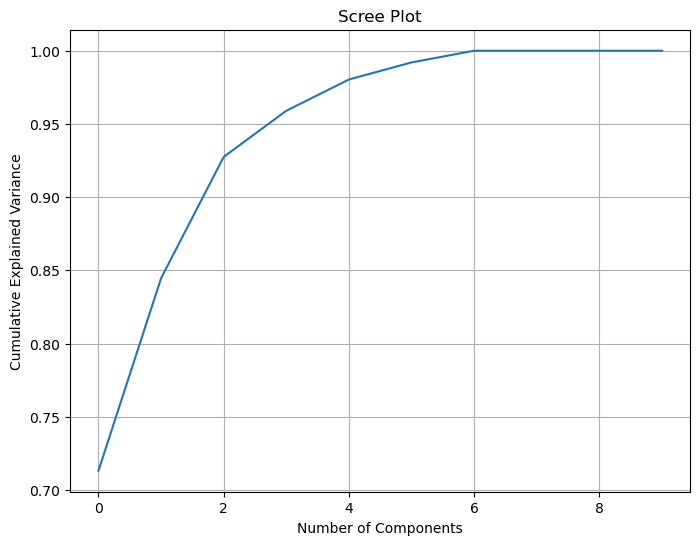

Number of components to retain: 4


In [26]:
# Step 5: PCA

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Determine the number of components to retain
n_components = np.where(np.cumsum(explained_variance_ratio) >= 0.95)[0][0] + 1
print("Number of components to retain:", n_components)

# Reduce dimensionality using the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [27]:
# Step 6: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [28]:
# Step 7: Model Training and Evaluation

# Initialize classifiers
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()

In [29]:
# Train and evaluate each classifier
classifiers = [('Logistic Regression', logistic_regression),
               ('Naive Bayes', naive_bayes),
               ('k-Nearest Neighbors (k-NN)', knn),
               ('Decision Trees', decision_tree),
               ('Random Forests', random_forest),
               ('Support Vector Machines (SVM)', svm),
               ('Gradient Boosting', gradient_boosting)]

In [30]:
results = []

In [31]:
for classifier_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict the target variable for the test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Append the results
    results.append((classifier_name, accuracy, cm))

In [32]:
# Print the results
for classifier_name, accuracy, cm in results:
    print(classifier_name)
    print("Accuracy:", accuracy *100)
    print("Confusion Matrix:")
    print(cm)
    print()

Logistic Regression
Accuracy: 60.99488609948861
Confusion Matrix:
[[1068  179]
 [ 660  244]]

Naive Bayes
Accuracy: 59.274755927475596
Confusion Matrix:
[[822 425]
 [451 453]]

k-Nearest Neighbors (k-NN)
Accuracy: 61.366806136680616
Confusion Matrix:
[[895 352]
 [479 425]]

Decision Trees
Accuracy: 59.7396559739656
Confusion Matrix:
[[857 390]
 [476 428]]

Random Forests
Accuracy: 60.80892608089261
Confusion Matrix:
[[842 405]
 [438 466]]

Support Vector Machines (SVM)
Accuracy: 59.879125987912595
Confusion Matrix:
[[1094  153]
 [ 710  194]]

Gradient Boosting
Accuracy: 62.250116225011624
Confusion Matrix:
[[954 293]
 [519 385]]



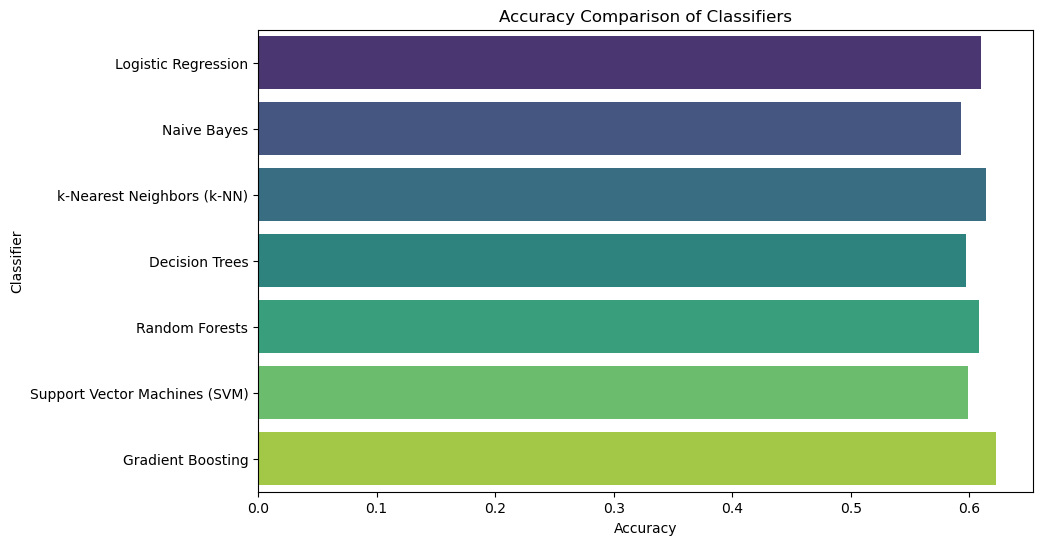

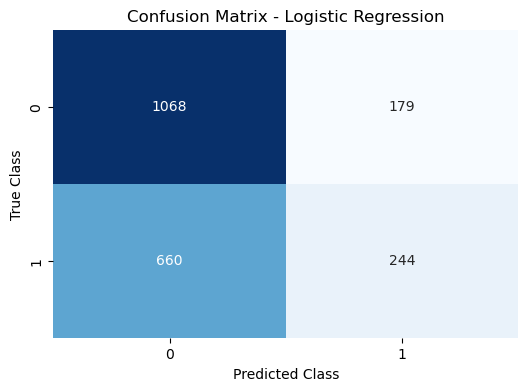

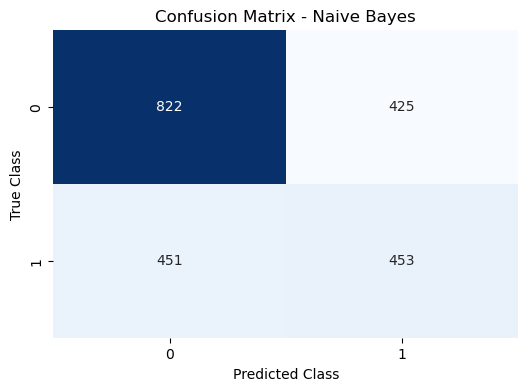

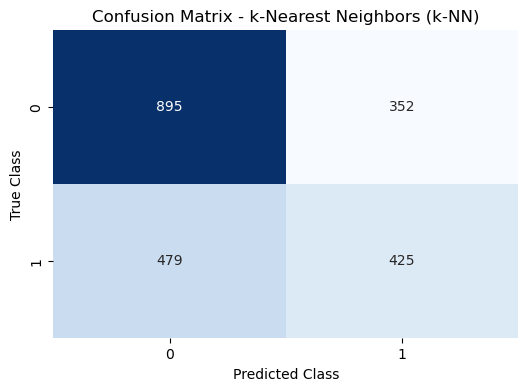

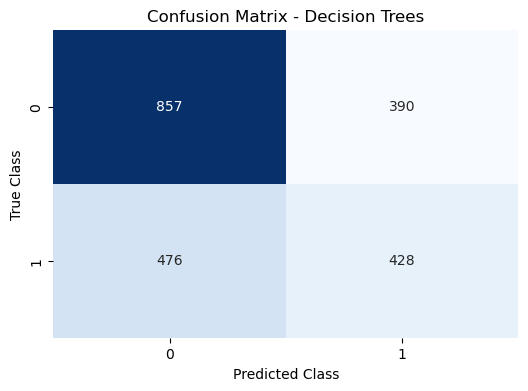

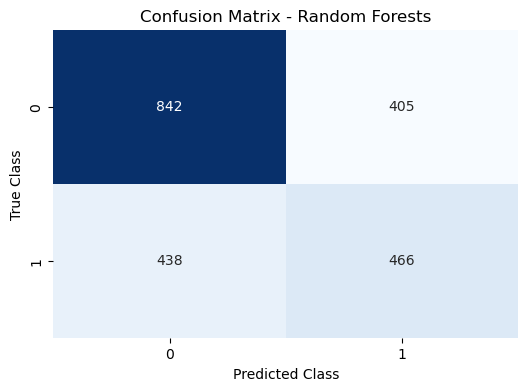

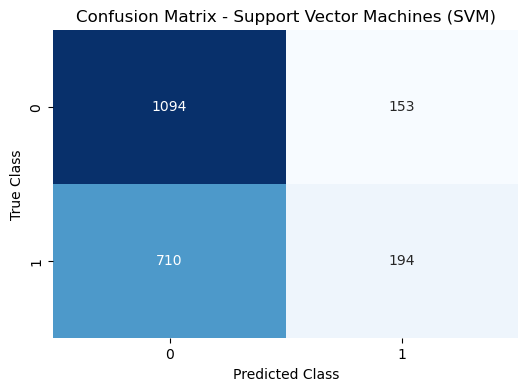

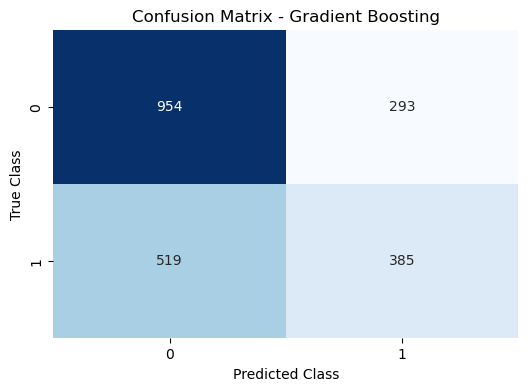

In [33]:
# Step 8: Visualize the Results

# Accuracy Comparison Bar Plot
accuracies = [accuracy for _, accuracy, _ in results]
classifier_names = [classifier_name for classifier_name, _, _ in results]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=classifier_names, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy Comparison of Classifiers')
plt.show()

# Confusion Matrix Heatmaps
for classifier_name, _, cm in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

In [34]:
# Step 9: Evaluating the Performance of the Models

# Print classification report for each classifier
for classifier_name, _, _ in results:
    classifier = [clf for clf in classifiers if clf[0] == classifier_name][0][1]
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report - {classifier_name}:")
    print(report)
    print()

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      Active       0.62      0.86      0.72      1247
    Inactive       0.58      0.27      0.37       904

    accuracy                           0.61      2151
   macro avg       0.60      0.56      0.54      2151
weighted avg       0.60      0.61      0.57      2151


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

      Active       0.65      0.66      0.65      1247
    Inactive       0.52      0.50      0.51       904

    accuracy                           0.59      2151
   macro avg       0.58      0.58      0.58      2151
weighted avg       0.59      0.59      0.59      2151


Classification Report - k-Nearest Neighbors (k-NN):
              precision    recall  f1-score   support

      Active       0.65      0.72      0.68      1247
    Inactive       0.55      0.47      0.51       904

    accuracy                           0.61   

In [35]:
# Select the best performing classifier based on accuracy
best_classifier = max(results, key=lambda x: x[1])
best_classifier_name = best_classifier[0]
best_classifier_model = [clf for clf in classifiers if clf[0] == best_classifier_name][0][1]


In [36]:
best_classifier_name

'Gradient Boosting'

In [37]:
best_classifier_model

GradientBoostingClassifier()